In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Utils import RMSELoss
from sklearn.metrics import r2_score
from collections import defaultdict
from scipy.stats import pearsonr, spearmanr
import pickle

import plotly
from scipy import stats
import plotly.express as px
import statsmodels.api as sm
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score, hinge_loss
import plotly.offline as pyo

/home/grinenko/anaconda3/envs/anna/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
rmse = RMSELoss()
def compute_metrics(y, y_pred, answer=None):
    if answer is None:
        answer = dict()
    answer['rmse'] = rmse(y_pred, y)
    answer['r2'] = r2_score(y, y_pred)
    answer['mae'] = np.mean(np.abs(y - y_pred))
    answer['corr'], answer['pvalue'] = pearsonr(y_pred, y)
    return answer


def visualize_subplots(data):
    plt.figure(figsize=(8 * (2 if len(MODES) >= 2 else 1), 6 * (2 if len(MODES) >= 3 else 1)))
    xy = {1:(1, 1), 2: (1, 2), 3: (2, 2)} 
    x, y = xy[len(MODES)]
    title = ['TRAIN', "VALID", "TEST"]
    for i, mode in enumerate(MODES):
        plt.subplot(x, y, i + 1)
        y_true = data.loc[data['mode'] == mode]['y'].to_numpy()
        y_pred = data.loc[data['mode'] == mode]['y_pred'].to_numpy()
        metrics = compute_metrics(y_true, y_pred)
        print(title[mode], metrics)
        plt.title(f"{title[mode]}: RMSE {metrics['rmse']:.2f}, R2 {metrics['r2']:.2f}")
        plt.plot(y_true, label="true")
        plt.plot(y_pred, label="pred")
        plt.legend()
    plt.plot()
    plt.show()

def reduce(metrics):
    answer = defaultdict(float)
    for m in metrics:
        for (key, value) in m.items():
            answer[key] += value
    for key in answer.keys():
        answer[key] /= len(metrics)
    return answer

In [4]:
PATH = 'gan_results/table_{0}_{1}---6.csv'

MODES = [0, 1, 2]
#0 TRAIN, 1 VALID, 2 TEST

SOFT_SENSOR_INDEX = 2
folds = 2
CV = range(folds)
# CV = [""]


In [5]:
metrics = []
for fold in CV:
    data = pd.read_csv(PATH.format(SOFT_SENSOR_INDEX, fold))
    y_true = data.loc[data['mode'] == 2]['y'].to_numpy()
    y_pred = data.loc[data['mode'] == 2]['y_pred'].to_numpy()
    metrics.append(compute_metrics(y_true, y_pred))
reduce(metrics)

defaultdict(float,
            {'rmse': tensor(1.1083),
             'r2': 0.2128939730075266,
             'mae': 0.9079418235354954,
             'corr': 0.6776993558859787,
             'pvalue': 6.492799680560712e-50})

TRAIN {'rmse': tensor(0.7819), 'r2': 0.5186619138051396, 'mae': 0.6071921181294225, 'corr': 0.7302361187873214, 'pvalue': 9.02935349507274e-84}
VALID {'rmse': tensor(0.9824), 'r2': 0.19476747282360385, 'mae': 0.8006785488128663, 'corr': 0.5596942480998466, 'pvalue': 1.1578728994641259e-11}
TEST {'rmse': tensor(1.2297), 'r2': 0.10985967162280075, 'mae': 1.013386997393364, 'corr': 0.7126932089362374, 'pvalue': 1.9840889436727576e-65}


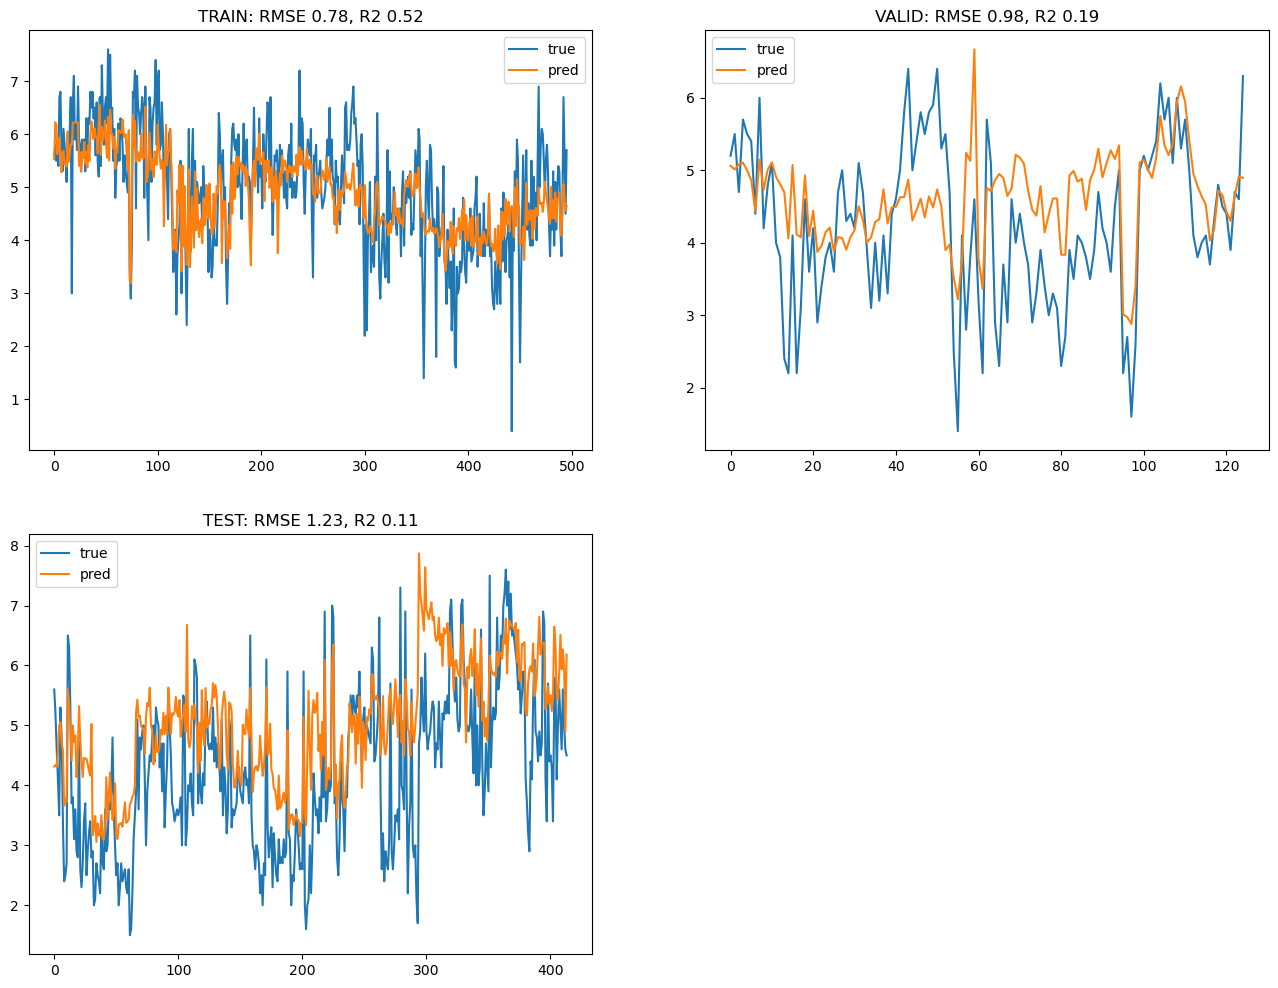

TRAIN {'rmse': tensor(0.7240), 'r2': 0.6093122504830171, 'mae': 0.532506728845258, 'corr': 0.7846496011573616, 'pvalue': 1.2028187128660888e-104}
VALID {'rmse': tensor(0.6916), 'r2': 0.5582799624123458, 'mae': 0.5391208755493164, 'corr': 0.7549097094926098, 'pvalue': 2.759622552130611e-24}
TEST {'rmse': tensor(0.9868), 'r2': 0.31592827439225246, 'mae': 0.8024966496776267, 'corr': 0.64270550283572, 'pvalue': 1.2985599361121421e-49}


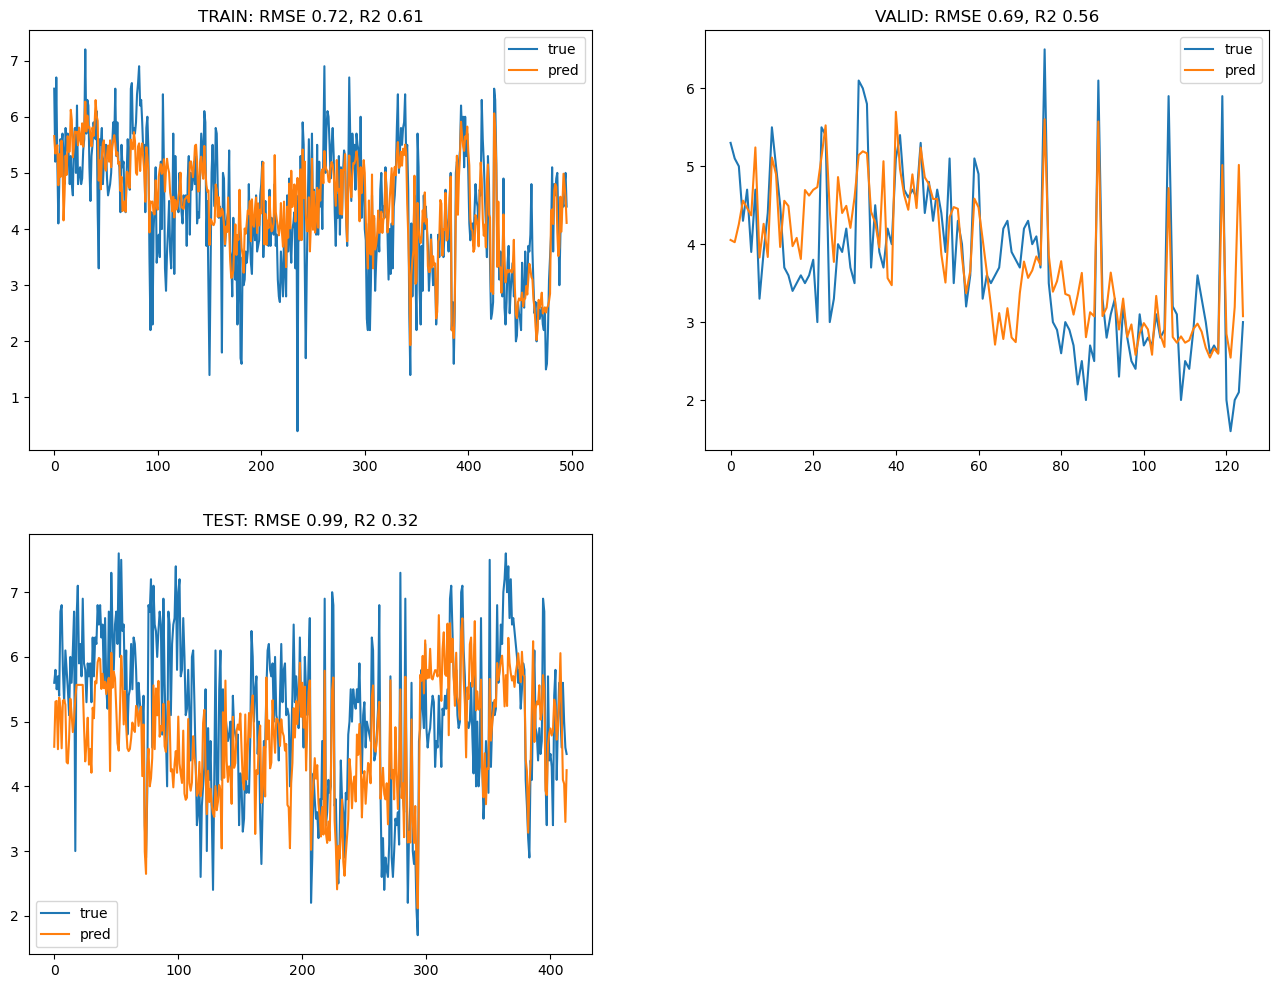

In [6]:
for fold in CV:
    data = pd.read_csv(PATH.format(SOFT_SENSOR_INDEX, fold))
    visualize_subplots(data)

In [7]:
reduce(metrics)

defaultdict(float,
            {'rmse': tensor(1.1083),
             'r2': 0.2128939730075266,
             'mae': 0.9079418235354954,
             'corr': 0.6776993558859787,
             'pvalue': 6.492799680560712e-50})

TRAIN {'rmse': tensor(0.7240), 'r2': 0.6093122504830171, 'mae': 0.532506728845258, 'corr': 0.7846496011573616, 'pvalue': 1.2028187128660888e-104}
VALID {'rmse': tensor(0.6916), 'r2': 0.5582799624123458, 'mae': 0.5391208755493164, 'corr': 0.7549097094926098, 'pvalue': 2.759622552130611e-24}
TEST {'rmse': tensor(0.9868), 'r2': 0.31592827439225246, 'mae': 0.8024966496776267, 'corr': 0.64270550283572, 'pvalue': 1.2985599361121421e-49}


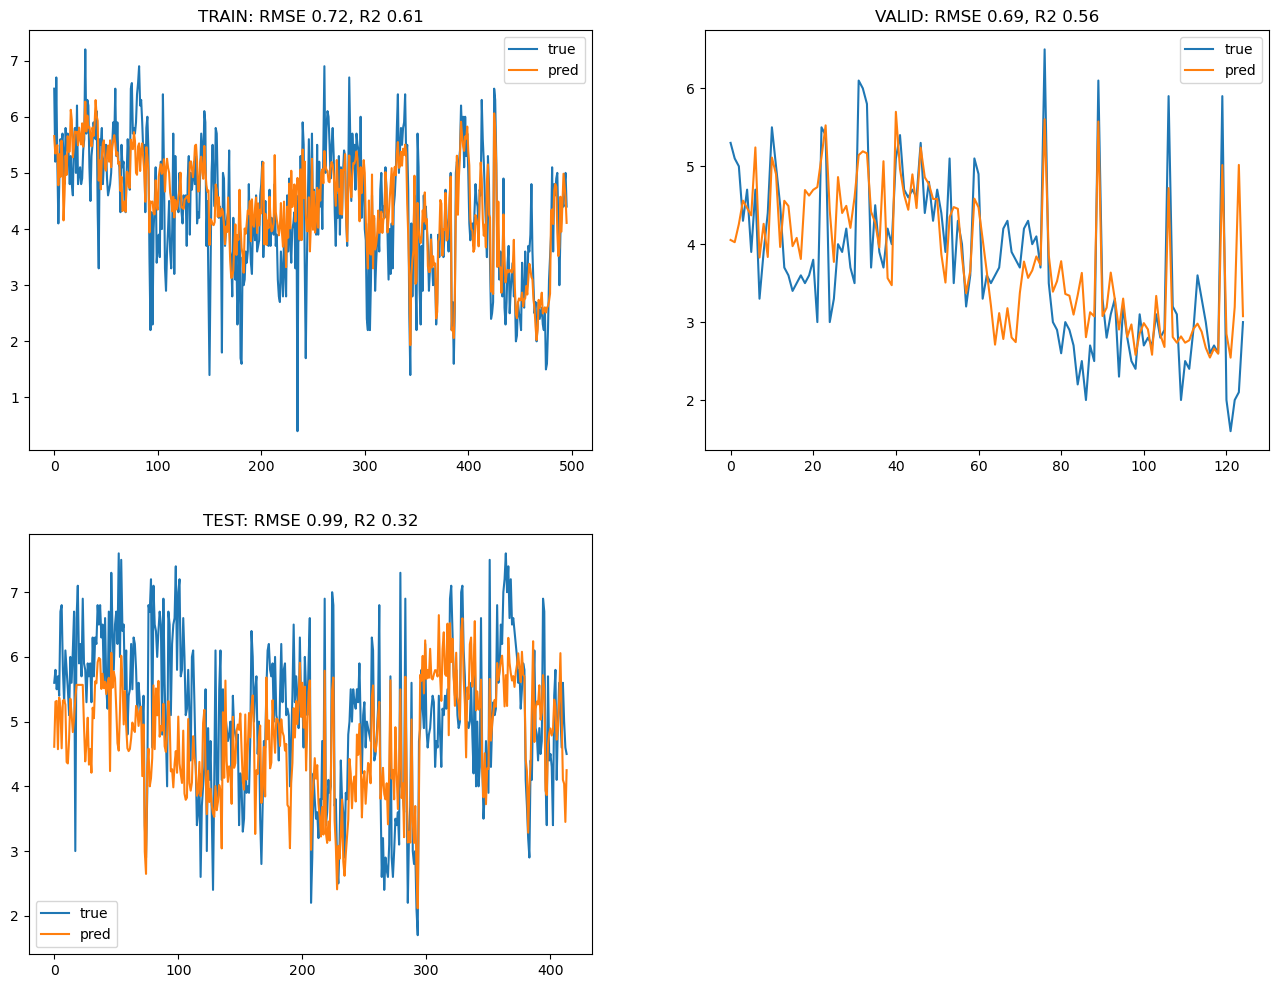

In [9]:
visualize_subplots(data)